# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [128]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress
from pprint import pprint
from datetime import datetime

# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "../output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [118]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

608

In [119]:
print(cities)

['ponta do sol', 'rochegda', 'barrow', 'hermanus', 'bambous virieux', 'necochea', 'tsihombe', 'grand river south east', 'isangel', 'rikitea', 'kodiak', 'cavan', 'yellowknife', 'bani', 'butaritari', 'busselton', 'port elizabeth', 'severo-kurilsk', 'lubao', 'kasamwa', 'ushuaia', 'bulgan', 'atuona', 'kahului', 'arlit', 'arraial do cabo', 'gambela', 'carnarvon', 'santander', 'albany', 'beringovskiy', 'airai', 'ribeira grande', 'provideniya', 'kingman', 'college', 'new norfolk', 'barentsburg', 'sawakin', 'vaini', 'siniscola', 'kimbe', 'punta arenas', 'avarua', 'samalaeulu', 'east london', 'arroyo', 'hasaki', 'castro', 'belushya guba', 'tazovskiy', 'labuhan', 'nikolskoye', 'hobart', 'san cristobal', 'grindavik', 'mandalgovi', 'bengkulu', 'kokopo', 'riviere-au-renard', 'mount gambier', 'taolanaro', 'tiksi', 'khatanga', 'san patricio', 'kapaa', 'hvammstangi', 'metu', 'bluff', 'high level', 'chokurdakh', 'aykhal', 'hithadhoo', 'myitkyina', 'leningradskiy', 'qaanaaq', 'vicam', 'wanxian', 'chersk

## Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [120]:
url = "http://api.openweathermap.org/data/2.5/weather?"
units = "imperial"
query_url =f"{url}&units={units}&appid={weather_api_key}&q="
print(query_url)

http://api.openweathermap.org/data/2.5/weather?&units=imperial&appid=a8408b6e1ea2314fd02eb179a23ae369&q=


In [121]:
#just for test to see the format 
response =requests.get(query_url).json()
pprint(response)

{'cod': '400', 'message': 'Nothing to geocode'}


In [122]:
#cities =['ketchikan', 'alekseyevskaya', 'fuxin']

In [123]:
time.sleep(1)
#setting up several lists to hold the weather info (based on teh HW CSV)
city_id =[]
city_name = []
cloudiness = []
country = []
date =[]
humidity =[]
Lat =[]
Lng =[]
max_temp = []
wind_speed = []
count= 0
set_count =1
record_count = 0
# open a print log

#open the csv, make the columns (lists), and pull the info to the csv 
#my_weather_data = open("weatherAPI_data.csv", "w")
#my_weather_data.write("City_ID, City, Cloudiness, Country, Date, Humidity, Lat, Lng, Max Temp, Wind Speed\n").write(city_id, city_name)

print(cities)



                          
    

['ponta do sol', 'rochegda', 'barrow', 'hermanus', 'bambous virieux', 'necochea', 'tsihombe', 'grand river south east', 'isangel', 'rikitea', 'kodiak', 'cavan', 'yellowknife', 'bani', 'butaritari', 'busselton', 'port elizabeth', 'severo-kurilsk', 'lubao', 'kasamwa', 'ushuaia', 'bulgan', 'atuona', 'kahului', 'arlit', 'arraial do cabo', 'gambela', 'carnarvon', 'santander', 'albany', 'beringovskiy', 'airai', 'ribeira grande', 'provideniya', 'kingman', 'college', 'new norfolk', 'barentsburg', 'sawakin', 'vaini', 'siniscola', 'kimbe', 'punta arenas', 'avarua', 'samalaeulu', 'east london', 'arroyo', 'hasaki', 'castro', 'belushya guba', 'tazovskiy', 'labuhan', 'nikolskoye', 'hobart', 'san cristobal', 'grindavik', 'mandalgovi', 'bengkulu', 'kokopo', 'riviere-au-renard', 'mount gambier', 'taolanaro', 'tiksi', 'khatanga', 'san patricio', 'kapaa', 'hvammstangi', 'metu', 'bluff', 'high level', 'chokurdakh', 'aykhal', 'hithadhoo', 'myitkyina', 'leningradskiy', 'qaanaaq', 'vicam', 'wanxian', 'chersk

In [124]:
#Loop through cities
for city in cities[:50]:
    time.sleep(1)
    count= count + 1 
    
    #print(response)
    try:
        #print(query_url + city)
        response =requests.get(query_url + city).json()
        city_id.append(response["id"])
        city_name.append(response["name"])
        cloudiness.append(response["clouds"]["all"])
        country.append(response["sys"]["country"])
        date.append(response["dt"])
        humidity.append(response["main"]["humidity"])
        Lat.append(response["coord"]["lat"])
        Lng.append(response["coord"]["lon"])
        max_temp.append(response["main"]["temp_max"])
        wind_speed.append(response["wind"]["speed"])
        
        if count > 49:
            count =0
            set_count+= 1
                          
        
            
        else:                  
            print(f"processing Record {count} of set {set_count}| {city}")  
    except(KeyError, IndexError):
        print("City not found, skipping")
        

processing Record 1 of set 1| ponta do sol
processing Record 2 of set 1| rochegda
processing Record 3 of set 1| barrow
processing Record 4 of set 1| hermanus
processing Record 5 of set 1| bambous virieux
processing Record 6 of set 1| necochea
City not found, skipping
City not found, skipping
processing Record 9 of set 1| isangel
processing Record 10 of set 1| rikitea
processing Record 11 of set 1| kodiak
processing Record 12 of set 1| cavan
processing Record 13 of set 1| yellowknife
processing Record 14 of set 1| bani
processing Record 15 of set 1| butaritari
processing Record 16 of set 1| busselton
processing Record 17 of set 1| port elizabeth
processing Record 18 of set 1| severo-kurilsk
processing Record 19 of set 1| lubao
processing Record 20 of set 1| kasamwa
processing Record 21 of set 1| ushuaia
processing Record 22 of set 1| bulgan
processing Record 23 of set 1| atuona
processing Record 24 of set 1| kahului
processing Record 25 of set 1| arlit
processing Record 26 of set 1| arr

In [125]:
my_weather_data= pd.DataFrame({"City_ID": city_id , "City" : city_name, "Cloudiness" :cloudiness , "Country": country, "Date": date, "Humidity":humidity, "Lat": Lat, "Lng": Lng, "Max Temp":max_temp , "Wind Speed": wind_speed})
my_weather_data

,City_ID,City,Cloudiness,Country,Date,Humidity,Lat,Lng,Max Temp,Wind Speed
0,2264557,Ponta do Sol,75,PT,1603744595,72,32.67,-17.10,66.20,8.05
1,501847,Rochegda,97,RU,1603744596,97,62.80,43.25,28.35,9.24
2,5880054,Barrow,90,US,1603744597,85,71.29,-156.79,19.40,5.82
3,3366880,Hermanus,85,ZA,1603744598,85,-34.42,19.23,63.00,4.00
4,1106677,Bambous Virieux,40,MU,1603744599,73,-20.34,57.76,73.40,10.29
5,3430443,Necochea,0,AR,1603744600,60,-38.55,-58.74,60.87,5.97
6,2136825,Isangel,18,VU,1603744604,72,-19.55,169.27,77.20,13.73
7,4030556,Rikitea,100,PF,1603744605,84,-23.12,-134.97,75.36,18.95
8,5866583,Saint Paul Harbor,40,US,1603744606,46,57.79,-152.41,50.00,16.11
9,2965535,Cavan,41,IE,1603744607,87,53.99,-7.36,45.00,3.00


## Convert Raw Data to DataFrame
* Save as csv

In [129]:

my_weather_data.to_csv(output_data_file, index_label ="City_ID")

In [131]:
#corrected-data_path = 'weatherAPI_data.csv'
corrected_data_path = "../output_data/cities.csv"

corrected_data_df = pd.read_csv(corrected_data_path)
corrected_data_df

,City_ID,City_ID.1,City,Cloudiness,Country,Date,Humidity,Lat,Lng,Max Temp,Wind Speed
0,0,2264557,Ponta do Sol,75,PT,1603744595,72,32.67,-17.10,66.20,8.05
1,1,501847,Rochegda,97,RU,1603744596,97,62.80,43.25,28.35,9.24
2,2,5880054,Barrow,90,US,1603744597,85,71.29,-156.79,19.40,5.82
3,3,3366880,Hermanus,85,ZA,1603744598,85,-34.42,19.23,63.00,4.00
4,4,1106677,Bambous Virieux,40,MU,1603744599,73,-20.34,57.76,73.40,10.29
5,5,3430443,Necochea,0,AR,1603744600,60,-38.55,-58.74,60.87,5.97
6,6,2136825,Isangel,18,VU,1603744604,72,-19.55,169.27,77.20,13.73
7,7,4030556,Rikitea,100,PF,1603744605,84,-23.12,-134.97,75.36,18.95
8,8,5866583,Saint Paul Harbor,40,US,1603744606,46,57.79,-152.41,50.00,16.11
9,9,2965535,Cavan,41,IE,1603744607,87,53.99,-7.36,45.00,3.00


## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

### Latitude vs. Temperature Plot

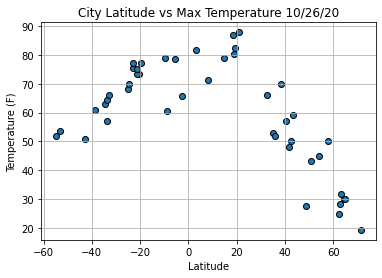

In [135]:
date = time.strftime("%m/%d/%y") 
lat_data = corrected_data_df["Lat"]
temp_data = corrected_data_df["Max Temp"]
plt.scatter(lat_data, temp_data, marker ="o", edgecolors="black")
plt.xlabel("Latitude")
plt.ylabel("Temperature (F)")
plt.grid(True)
plt.title(f"City Latitude vs Max Temperature {date}")
plt.savefig("Images/Lat_vs_temp.png")
plt.show()

### Latitude vs. Humidity Plot

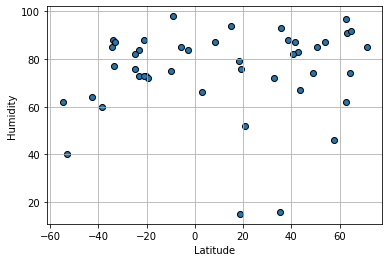

In [137]:
cloud_data = corrected_data_df["Humidity"]
plt.scatter(lat_data, cloud_data, marker ="o", edgecolors="black")
plt.xlabel("Latitude")
plt.ylabel("Humidity")
plt.grid(True)
#plt.title(f"City Latitude vs Max Temperature {}")
plt.savefig("Images/Lat_vs_hume.png")
plt.show()

### Latitude vs. Cloudiness Plot

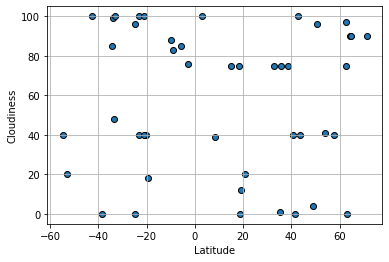

In [138]:
hume_data = corrected_data_df["Cloudiness"]
plt.scatter(lat_data, hume_data, marker ="o", edgecolors="black")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness")
plt.grid(True)
#plt.title(f"City Latitude vs Max Temperature {}")
plt.savefig("Images/Lat_vs_cloud.png")
plt.show()

### Latitude vs. Wind Speed Plot

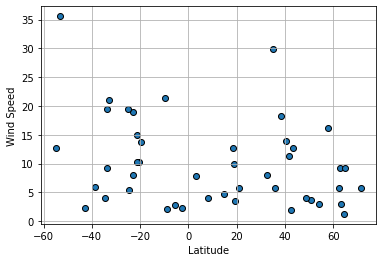

In [139]:
hume_data = corrected_data_df["Wind Speed"]
plt.scatter(lat_data, hume_data, marker ="o", edgecolors="black")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed")
plt.grid(True)
#plt.title(f"City Latitude vs Max Temperature {}")
plt.savefig("Images/Lat_vs_Wind_Speed.png")
plt.show()

## Linear Regression

### Write linear regression plot function (optional)

###  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

cthe r-value is : 0.8470878237426251


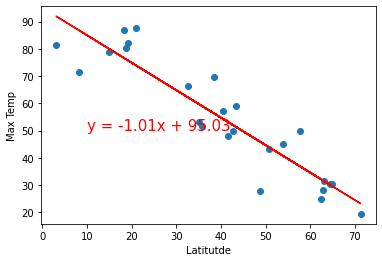

In [144]:
#make a regin with lat (0,80)
#Correlating the 
nh_mt = corrected_data_df[corrected_data_df["Lat"] >=0]
nh_mt
def linear_regression(x,y,y_label,coordinates):
    
    (slope, intercept, rvalue, pvalue, stderr) = linregress(x, y)
    regress_values = x * slope + intercept
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    plt.scatter(x,y)
    plt.plot(x,regress_values,"r-")
    plt.annotate(line_eq,coordinates,fontsize=15,color="red")
    print(f"cthe r-value is : {rvalue**2}")
    plt.xlabel('Latitutde')
    plt.ylabel(y_label)
    plt.show()
    
x= nh_mt["Lat"]
y= nh_mt["Max Temp"]
linear_regression(x,y,"Max Temp",(10,50))

###  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

In [ ]:
sh_mt = corrected_data_df[corrected_data_df["Lat"] < 0]
sh_mt

###  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

###  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

###  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

###  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

###  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

###  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression